In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets ## imports datasets from scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Datasets

In [3]:
df_target = pd.read_csv('boston_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'boston_data.csv'

In [ ]:
df_target.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


# Some Exploration

## 1. When variables are centered, the intercept term is always 0

This is to show that when all variables are centered, the intercept beta_0 is always 0.

In [ ]:
df_centered = df_target - df_target.mean(axis=0)    # centering the data
model = smf.ols(formula='MEDV ~ CHAS + RM + AGE', data=df_centered).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     203.8
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           1.93e-86
Time:                        23:02:10   Log-Likelihood:                -1638.7
No. Observations:                 506   AIC:                             3285.
Df Residuals:                     502   BIC:                             3302.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.996e-15      0.275  -1.81e-14      1.000      -0.541       0.541
CHAS           5.0278      1.097      4.585      0.000       2.873       7.182
RM             8.1855      0.407     20.119      0.000       7.386       8.985
AGE           -0.0780      0.010     -7.684      0.000      -0.098      -0.058
==============================================================================
Omnibus:                      179.098   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1274.618
Skew:                           1.355   Prob(JB):                    1.66e-277
Kurtosis:                      10.287   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. Standardization

We can use the StandardScaler from sklearn package

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.DataFrame([[0, 0], [0, 0], [1, 1], [1, 1]],dtype=np.float64)
data

,0,1
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0


In [ ]:
scaler = StandardScaler() # call the scaler function
scaler.fit(data) # use the scaler to fit the data
print('mean of data', scaler.mean_, 'variance of data', scaler.var_)

data_scaled = scaler.transform(data) # use transform to obtain the scaled data
print('scaled data is\n', data_scaled)

mean of data [0.5 0.5] variance of data [0.25 0.25]
scaled data is
 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [ ]:
print('transformed data:', scaler.transform([[2, 2]]))   # Now we can transform any data points

transformed data: [[3. 3.]]


# Lasso and Ridge

Recall in our class, the objective for lasso is defined as: 
$$||y - X\beta||^2_2 + \alpha * ||\beta||_1$$

The objective for ridge is defined as: 
$$||y - X\beta||^2_2 + \alpha * ||\beta||^2_2$$

## 1. Without Cross-validation

### 1.1 Lasso (use sklearn package) 

The objective used in skelearn package for Lasso is: 
$$\frac{1}{2n}||y - X\beta||^2_2 + \alpha * ||\beta||_1$$
This is a little different from our definition. They are using the MSE rather than RSS, but that is ok! n is just a constant once the dataset is determined.

In [ ]:
# First step, transformation
from sklearn.preprocessing import StandardScaler
y = df_target['MEDV']
df_dummy = pd.get_dummies(df_target, columns = ['CHAS'],drop_first = True, dtype=int)       # Change categorical to one-hot
X = df_dummy.drop(columns=['ZN','INDUS','NOX','RAD','AGE','PTRATIO','B','MEDV']) # we don't include these variables in the model
X

,CRIM,RM,DIS,TAX,LSTAT,CHAS_1.0
0,0.00632,6.575,4.0900,296.0,4.98,0
1,0.02731,6.421,4.9671,242.0,9.14,0
2,0.02729,7.185,4.9671,242.0,4.03,0
3,0.03237,6.998,6.0622,222.0,2.94,0
4,0.06905,7.147,6.0622,222.0,5.33,0
...,...,...,...,...,...,...
501,0.06263,6.593,2.4786,273.0,9.67,0
502,0.04527,6.120,2.2875,273.0,9.08,0
503,0.06076,6.976,2.1675,273.0,5.64,0
504,0.10959,6.794,2.3889,273.0,6.48,0


In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
y[:5]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2]])

In [ ]:
scaler_x, scaler_y = StandardScaler(), StandardScaler()
scaler_x.fit(X)
scaler_y.fit(y)

scaled_X = scaler_x.transform(X)
scaled_y = scaler_y.transform(y)
print(scaled_X)

[[-0.41978194  0.41367189  0.1402136  -0.66660821 -1.0755623  -0.27259857]
 [-0.41733926  0.19427445  0.55715988 -0.98732948 -0.49243937 -0.27259857]
 [-0.41734159  1.28271368  0.55715988 -0.98732948 -1.2087274  -0.27259857]
 ...
 [-0.41344658  0.98496002 -0.77368357 -0.80321172 -0.98304761 -0.27259857]
 [-0.40776407  0.72567214 -0.66843684 -0.80321172 -0.86530163 -0.27259857]
 [-0.41500016 -0.36276709 -0.61324648 -0.80321172 -0.66905833 -0.27259857]]


In [ ]:
# Lasso
from sklearn.linear_model import Lasso            # Run Lasso with a given parameter
model = Lasso(alpha=200/(2*len(y)))              # alpha = alpha/2n give the result as we have in class 
model.fit(scaled_X, scaled_y)

Lasso(alpha=0.1976284584980237)

In [ ]:
print('model coefficient:', model.coef_)         # beta_1, beta_2,...,beta_6
print('intercept:', model.intercept_)            # beta_0 (we see that with the transformation, beta_0 = 0)
print('R^2:', model.score(scaled_X, scaled_y))                  # R^2

model coefficient: [-0.          0.26676666  0.         -0.         -0.37629069  0.        ]
intercept: [-6.06783185e-16]
R^2: 0.5901594254603677


In [ ]:
y_pred = model.predict(scaled_X)                        # Predicting y given training set X
print('first 5 predicted values:', y_pred[:5])

first 5 predicted values: [0.51507795 0.23712629 0.7970181  0.78344172 0.71400623]


Make prediction on new points

In [ ]:
new_x = np.array([[1,1,1,1,1,1]])
scaled_new_x = scaler_x.transform(new_x)
print('scaled_new_x',scaled_new_x)

y_pred = model.predict(scaled_new_x)
print('prediction on a new point', y_pred)

scaled_new_x [[-0.30414418 -7.52880023 -1.32867704 -2.41869666 -1.63345396  3.66839786]]
prediction on a new point [-1.39377935]


### 1.2 Ridge (sklearn)

The objective for ridge is: 
$||y - X\beta||^2_2 + \alpha * ||\beta||^2_2$

In [ ]:
# Ridge
from sklearn.linear_model import Ridge      # Runs Ridge with a given parameter
model = Ridge(alpha=100)        # Here alpha is like lambda in our slide
model.fit(scaled_X, scaled_y)

Ridge(alpha=100)

In [ ]:
print('model coefficient:', model.coef_)         # beta_1, beta_2,...,beta_6
print('intercept:', model.intercept_)            # beta_0 (we see that with the transformation, beta_0 = 0)
print('R^2:', model.score(scaled_X,scaled_y))                  # R^2

model coefficient: [[-0.07387825  0.34745115 -0.08399474 -0.13261364 -0.38039422  0.08839283]]
intercept: [-6.11543333e-16]
R^2: 0.6674744147021963


In [ ]:
y_pred = model.predict(scaled_X)                        # Predicting y given X
print('first 5 predicted values:', y_pred[:5])

first 5 predicted values: [[0.63640959]
 [0.34569337]
 [0.99634483]
 [0.93388339]
 [0.87988503]]


Make prediction on new points

In [ ]:
new_x = np.array([[1,1,1,1,1,1]])
scaled_new_x = scaler_x.transform(new_x)
print('scaled_new_x',scaled_new_x)

y_pred = model.predict(scaled_new_x)
print('prediction on a new point', y_pred)

scaled_new_x [[-0.30414418 -7.52880023 -1.32867704 -2.41869666 -1.63345396  3.66839786]]
prediction on a new point [[-1.21545011]]


### 1.3 Lasso and Ridge using statsmodels package

#### Full model

In [ ]:
import statsmodels.api as sm
model = sm.OLS(scaled_y, scaled_X).fit()  # Here we exlucde the intercept as we now it is 0 for standardized data. 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.674
Method:                 Least Squares   F-statistic:                              175.1
Date:                Mon, 31 Mar 2025   Prob (F-statistic):                   1.87e-119
Time:                        23:03:48   Log-Likelihood:                         -431.62
No. Observations:                 506   AIC:                                      875.2
Df Residuals:                     500   BIC:                                      900.6
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0583      0.032     -1.819      0.069      -0.121       0.005
x2             0.3715      0.033     11.387      0.000       0.307       0.436
x3            -0.1536      0.032     -4.789      0.000      -0.217      -0.091
x4            -0.1467      0.036     -4.111      0.000      -0.217      -0.077
x5            -0.4746      0.039    -12.061      0.000      -0.552      -0.397
x6             0.0920      0.026      3.564      0.000       0.041       0.143
==============================================================================
Omnibus:                      165.592   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.809
Skew:                           1.446   Prob(JB):                    1.30e-141
Kurtosis:                       7.734   Cond. No.                         3.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### lasso

The objective for this package is:
    $\frac{1}{2n}||y - X\beta||^2_2 +\alpha\left(0.5*(1−𝐿1\_𝑤𝑡)∗||\beta||^2_2+𝐿1\_𝑤𝑡∗||\beta||_1\right)$

In [ ]:
model = sm.OLS(scaled_y, scaled_X).fit_regularized(alpha=100/(2*len(y)), L1_wt=1.0) # Lasso
print(model.params)

# Compare with the one obtained by sklearn 
# [-0.00086681  0.32933391 -0.         -0.05047752 -0.40762918  0.0225659 ]

[ 0.          0.32929891  0.         -0.05089761 -0.40781574  0.02259253]


#### Ridge

In [ ]:
model = sm.OLS(scaled_y, scaled_X).fit_regularized(alpha=100/len(y), L1_wt=0)  # Ridge (Need to pay attention to the built-in objective)
print(model.params)

# Compare with the one obtained by sklearn 
# [-0.07387825  0.34745115 -0.08399474 -0.13261364 -0.38039422  0.08839283]

[-0.07387825  0.34745115 -0.08399474 -0.13261364 -0.38039422  0.08839283]


## 2. Lasso and Ridge with Cross-Validation

### 2.1 Split data in Kfold

In [ ]:
from sklearn.model_selection import KFold # We use the KFold from sklearn package
kf = KFold(n_splits=5) # do not shuffle
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    print("TEST_first_5:", test_index[:5], "TEST_last_5:", test_index[-5:])

TRAIN: 404 TEST: 102
TEST_first_5: [0 1 2 3 4] TEST_last_5: [ 97  98  99 100 101]
TRAIN: 405 TEST: 101
TEST_first_5: [102 103 104 105 106] TEST_last_5: [198 199 200 201 202]
TRAIN: 405 TEST: 101
TEST_first_5: [203 204 205 206 207] TEST_last_5: [299 300 301 302 303]
TRAIN: 405 TEST: 101
TEST_first_5: [304 305 306 307 308] TEST_last_5: [400 401 402 403 404]
TRAIN: 405 TEST: 101
TEST_first_5: [405 406 407 408 409] TEST_last_5: [501 502 503 504 505]


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True) # shuffle
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


In [ ]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    print("TEST_first_5:", test_index[:5], "TEST_last_5:", test_index[-5:])

TRAIN: 404 TEST: 102
TEST_first_5: [ 3  5  9 14 19] TEST_last_5: [469 472 480 497 500]
TRAIN: 405 TEST: 101
TEST_first_5: [ 2  6 11 16 21] TEST_last_5: [493 498 499 503 505]
TRAIN: 405 TEST: 101
TEST_first_5: [ 1  7 12 17 28] TEST_last_5: [479 490 491 502 504]
TRAIN: 405 TEST: 101
TEST_first_5: [ 0 15 20 22 31] TEST_last_5: [488 489 495 496 501]
TRAIN: 405 TEST: 101
TEST_first_5: [ 4  8 10 13 18] TEST_last_5: [466 477 484 487 494]


We don't need to use the above K-fold function for cross-validation. The built-in function already does this for us

### 2.2 We can use the builtin Package cross_val_score to evaluate the model

In [ ]:
from sklearn.model_selection import cross_val_score
model = Lasso(alpha=100/(2*len(y)))                    
print(cross_val_score(model, scaled_X, scaled_y, cv=5, scoring='neg_mean_squared_error'))
# Output the cross validation score for each fold. negative MSE

[-0.14513709 -0.37761081 -0.76012409 -0.89007308 -0.45915233]


In [ ]:
from sklearn.model_selection import cross_val_score
model = Ridge(alpha=100) 
print(cross_val_score(model, scaled_X, scaled_y, cv=5, scoring='neg_mean_squared_error'))
# Output the cross validation score for each fold. negative MSE

[-0.14619791 -0.35977661 -0.55194444 -0.80376287 -0.3492791 ]


### 2.3 Grid Search and CV search for the best lambda

In [ ]:
# First step, transformation
from sklearn.preprocessing import StandardScaler
y = target
df_dummy = pd.get_dummies(df, columns = ['CHAS'],drop_first = True) # Change categorical to one-hot
X = df_dummy
X

In [ ]:
y = df_target['MEDV'].values.reshape(-1,1)
df_dummy = pd.get_dummies(df_target, columns = ['CHAS'],drop_first = True, dtype=int)       # Change categorical to one-hot
X = df_dummy.drop(columns=['MEDV'])
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,0


In [ ]:
scaler_x, scaler_y = StandardScaler(), StandardScaler() # Instantiate two StandardScaler objects for X and y
scaler_x.fit(X)                                         # Compute the mean and std to be used for later scaling of the features
scaler_y.fit(y)                                         # Compute the mean and std to be used for later scaling of the target
scaled_X = scaler_x.transform(X)                        # Scale features
scaled_y = scaler_y.transform(y)                        # Scale target


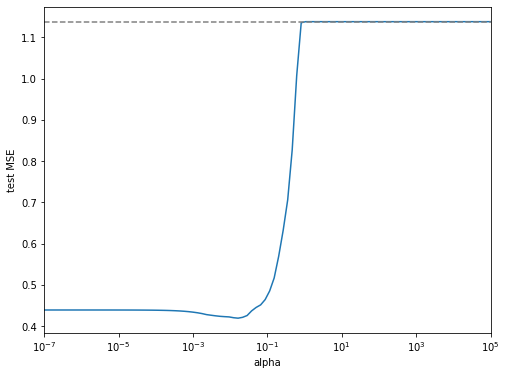

{'alpha': 0.016297508346206434}
alpha in our course 16.49307844636091


In [ ]:
from sklearn.model_selection import GridSearchCV
model = Lasso()
alphas = np.logspace(-7, 5, 100)           # Generate 100 alpha values between 10^-7 and 10^5

tuned_parameters = [{'alpha': alphas}]     # Prepare parameter grid for 'alpha'
n_folds = 5

# Initialize GridSearchCV with the model, parameter grid, number of folds, and scoring method.
clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clf.fit(scaled_X, scaled_y)

scores = -clf.cv_results_['mean_test_score'] # the score is -MSE, so we change the sign. 

# Plotting
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.ylabel('test MSE')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

# Print Selected Hyperparameter
print(clf.best_params_)
print('alpha in our course', clf.best_params_['alpha'] * 2 * len(y))


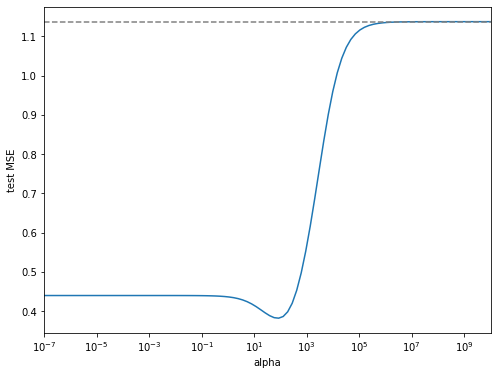

{'alpha': 84.97534359086438}


In [ ]:
from sklearn.model_selection import GridSearchCV
model = Ridge()
alphas = np.logspace(-7, 10, 100)            # Generate 100 alpha values between 10^-7 and 10^5

tuned_parameters = [{'alpha': alphas}]       # Prepare parameter grid for 'alpha'
n_folds = 5

# Initialize GridSearchCV with the model, parameter grid, number of folds, and scoring method.
clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clf.fit(scaled_X, scaled_y)

scores = -clf.cv_results_['mean_test_score']  # the score is -MSE, so we change the sign. 

# Plotting
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.ylabel('test MSE')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

# Print Selected Hyperparameter
print(clf.best_params_)